#About Dataset
**Description:** Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into **malignant (cancerous)** or **benign(non cancerous)**. We can analyse various machine learning approach for classifying the tumors with the Breast Cancer Wisconsin (Diagnostic) Dataset.

  * radius (mean of distances from center to points on the perimeter)
  * texture (standard deviation of gray-scale values)
  * perimeter
  * area
  * smoothness (local variation in radius lengths)
  * compactness (perimeter^2 / area - 1.0)
  * concavity (severity of concave portions of the contour)
  * concave points (number of concave portions of the contour)
  * symmetry
  * fractal dimension ("coastline approximation" - 1)

#Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(3)

In [ ]:
from sklearn.metrics  import f1_score, accuracy_score, classification_report, confusion_matrix, recall_score, precision_score


#Reading the dataset

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/refs/heads/main/Data/breast-cancer.csv')
data

In [ ]:
data.columns

In [ ]:
data.info()

In [ ]:
data.diagnosis.value_counts()


In [ ]:
# Count of Diagnosis (M = Malignant, B = Benign)
plt.figure(figsize=(5,3))
sns.countplot(x='diagnosis', data=data, hue = "diagnosis")
plt.title('Diagnosis Count')
plt.show()

In [ ]:
data.groupby(data.diagnosis).mean()

In [ ]:
data.isnull().sum()

In [ ]:
data.duplicated().sum()

In [ ]:
data.describe()

In [ ]:
# Pairplot for a quick overview of relationships between variables
sns.pairplot(data, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'area_mean', 'perimeter_mean',"smoothness_mean"])
plt.show()

In [ ]:
# Correlation heatmap of features
plt.figure(figsize=(20,15))
correlation = data.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Distribution Plots for Mean Features by Diagnosis
mean_columns = data.columns[2:12]  # Selecting columns related to mean features
plt.figure(figsize=(20,15))

for i, column in enumerate(mean_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data=data, x=column, hue='diagnosis', kde=True, element="step", bins=25)
    plt.title(f'Distribution of {column} by Diagnosis')

plt.tight_layout()
plt.show()

In [ ]:
worst_features = data[['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'diagnosis']]

# Creating a pairplot for "worst" features
sns.pairplot(worst_features, hue='diagnosis', diag_kind='kde')
plt.show()

#Splitting the dataset

In [ ]:
X=data.drop(['id','diagnosis'],axis=1)
y=data['diagnosis'].map(lambda x: 1 if x == 'M' else 0)

In [ ]:
X

In [ ]:
y

##Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train


##Scaling the data

In [ ]:
scaler = StandardScaler()


In [ ]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
X_test.shape

##Model

In [ ]:
compare=pd.DataFrame({'Model':[], "Training Accuracy":[], "Testing Accuracy":[], "F1 Score":[], "Recall":[],
                     "Precision":[]})
compare

#1. Logistic Regression
Logistic regression is used for **binary classification** where we use sigmoid function, that takes **input as independent variables** and produces a **probability value between 0 and 1**.

Key Points:

   * Logistic regression predicts the output of a categorical dependent variable. Therefore, the outcome must be a categorical or discrete value.
   * It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.
   * In Logistic regression, instead of fitting a regression line, we fit an “S” shaped logistic function, which predicts two maximum values (0 or 1).

Types of Logistic Regression
- Binomial (0 or 1, Pass or Fail...)
- Multinomial (3 or more, cat, dog or sheep)
- Ordinal (low, medium, high)

In [ ]:
LR=LogisticRegression()

In [ ]:
LR.fit(X_train,y_train)

In [ ]:
y_pred=LR.predict(X_test)
y_pred


In [ ]:
print(classification_report(y_test,y_pred))


In [ ]:
train_acc=LR.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)



In [ ]:
compare.loc[0]=['Logistic Regression', train_acc, test_acc, f1, recal, prec]

In [ ]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

#2. Support Vector Machine
- A Support Vector Machine (SVM) is a powerful machine learning algorithm widely used for both **linear and nonlinear classification**, as well as **regression and outlier detection** tasks.
- SVMs are highly adaptable, making them suitable for various applications such as text classification, image classification, spam detection, handwriting identification, gene expression analysis, face detection, and anomaly detection.

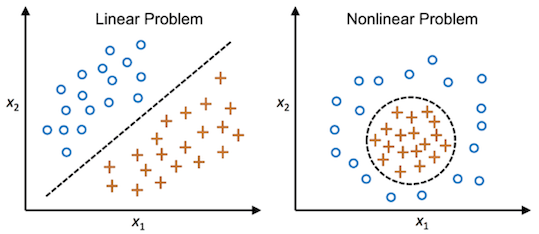

The dimension of the hyperplane depends on the number of features. For instance,
- if there are two input features, the hyperplane is simply a line, and
- if there are three input features, the hyperplane becomes a 2-D plane.

As the number of features increases beyond three, the complexity of visualizing the hyperplane also increases.

In [ ]:
svm=SVC()

In [ ]:
svm.fit(X_train,y_train)


In [ ]:
y_pred=svm.predict(X_test)
y_pred

In [ ]:
print(classification_report(y_test,y_pred))


In [ ]:
train_acc=svm.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

In [ ]:
compare.loc[1]=['Support Vector Machine', train_acc, test_acc, f1, recal, prec]


In [ ]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

#3. K-Nearest Neighbors - KNN
The K-Nearest Neighbors (KNN) algorithm is a supervised machine learning method employed to tackle classification and regression problems.

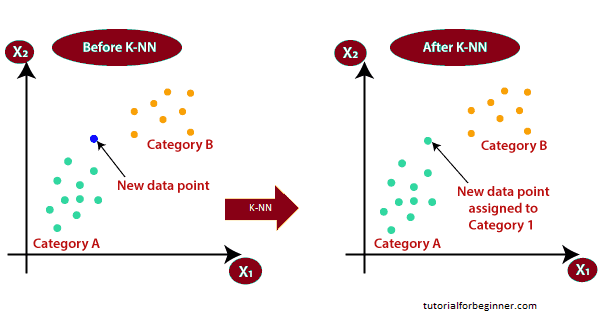

KNN algorithm helps us identify the nearest points or the groups for a query point.

**Distance metrics**
- Euclidean Distance
- Manhattan Distance
- Minkowski Distance

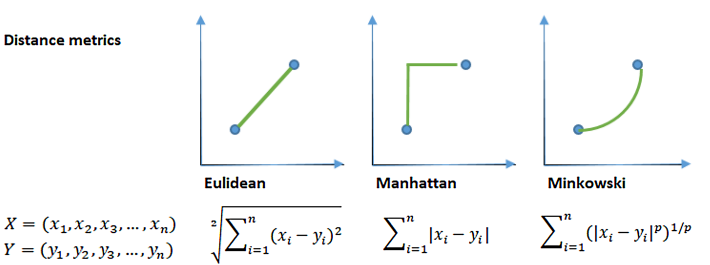

In [ ]:
knn=KNeighborsClassifier(n_neighbors=9)

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
y_pred=knn.predict(X_test)
y_pred

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
train_acc=knn.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

In [ ]:
compare.loc[2]=['KNN', train_acc, test_acc, f1, recal, prec]

In [ ]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

#4. Naives Bayes Algorithm
* Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for **solving classification problems**.
* It is mainly used in text classification that includes a high-dimensional training dataset.
* Naïve Bayes Classifier is one of the **simple and most effective Classification algorithms** which helps in building the fast machine learning models that can make quick predictions.
* It is a **probabilistic classifier**, which means it predicts on the basis of the probability of an object.
*It is called Naïve because it assumes that the occurrence of a certain feature is independent of the occurrence of other features.

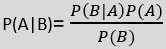

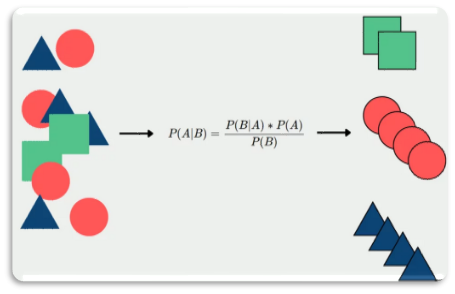

In [ ]:
NB = GaussianNB()

In [ ]:
NB.fit(X_train,y_train)

In [ ]:
y_pred=NB.predict(X_test)
y_pred

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
train_acc=NB.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

In [ ]:
compare.loc[3]=['Gaussian Naives Bayes', train_acc, test_acc, f1, recal, prec]


In [ ]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

#5. Decision Tree
* Decision Tree is a Supervised learning technique that can be used for **both classification and Regression problems**, but mostly it is preferred for solving Classification problems.
* It is a tree-structured classifier, where **internal nodes** *represent the features* of a dataset, **branches** *represent the decision rules* and each **leaf node** *represents the outcome*.
* In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.

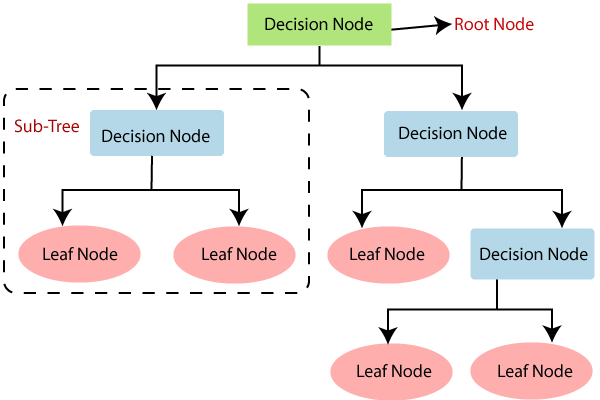

**Why use Decision Trees?**

    - Decision Trees usually mimic human thinking ability while making a decision, so it is easy to understand.
    - The logic behind the decision tree can be easily understood because it shows a tree-like structure.

Missing Values Support

      DecisionTreeClassifier and DecisionTreeRegressor have built-in support for missing values when
      splitter='best' and criterion is
      'gini', 'entropy’, 'log_loss', for classification or
      'squared_error', 'friedman_mse', 'poisson' for regression.

In [ ]:
DT=DecisionTreeClassifier(random_state=8)

In [ ]:
DT.fit(X_train,y_train)

In [ ]:
y_pred=DT.predict(X_test)
y_pred

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
train_acc=DT.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

In [ ]:
compare.loc[4]=['Decision Tree', train_acc, test_acc, f1, recal, prec]

In [ ]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

#6. Random forest algorithm
- Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique.
- It can be used for **both Classification and Regression problems** in ML.
- It is based on the concept of **ensemble learning**, which is a **process of combining multiple classifiers to solve a complex problem** and to improve the performance of the model.
- Random Forest is a **classifier that contains a number of decision trees on various subsets of the given dataset and takes the average/majority** to improve the predictive accuracy of that dataset.

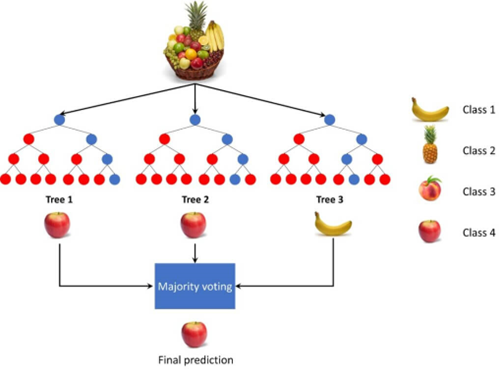

**Why use Random Forest?**

    - It takes less training time as compared to other algorithms.
    - It predicts output with high accuracy, even for the large dataset it runs efficiently.
    - It can also maintain accuracy when a large proportion of data is missing.

In [ ]:
RF=RandomForestClassifier(n_estimators=50,random_state=1)

In [ ]:
RF.fit(X_train,y_train)

In [ ]:
y_pred=RF.predict(X_test)
y_pred

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
train_acc=RF.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

In [ ]:
compare.loc[5]=['Random forest', train_acc, test_acc, f1, recal, prec]

In [ ]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

##7. Gradient Boosting
Machine learning is one of the most popular technologies **to build predictive models for various complex regression and classification tasks**.
Gradient Boosting Machine (GBM) is considered one of the most powerful boosting algorithms.

      Boosting is one of the popular learning ensemble modeling techniques used to build strong classifiers from various weak classifiers.
      It starts with building a primary model from available training data sets then it identifies the errors present in the base model.
      After identifying the error, a secondary model is built, and further, a third model is introduced in this process.
      In this way, this process of introducing more models is continued until we get a complete training data set by which model predicts correctly.

      AdaBoost (Adaptive boosting) was the first boosting algorithm to combine various weak classifiers into a single strong classifier in the history of machine learning.
      It primarily focuses to solve classification tasks such as binary classification.

  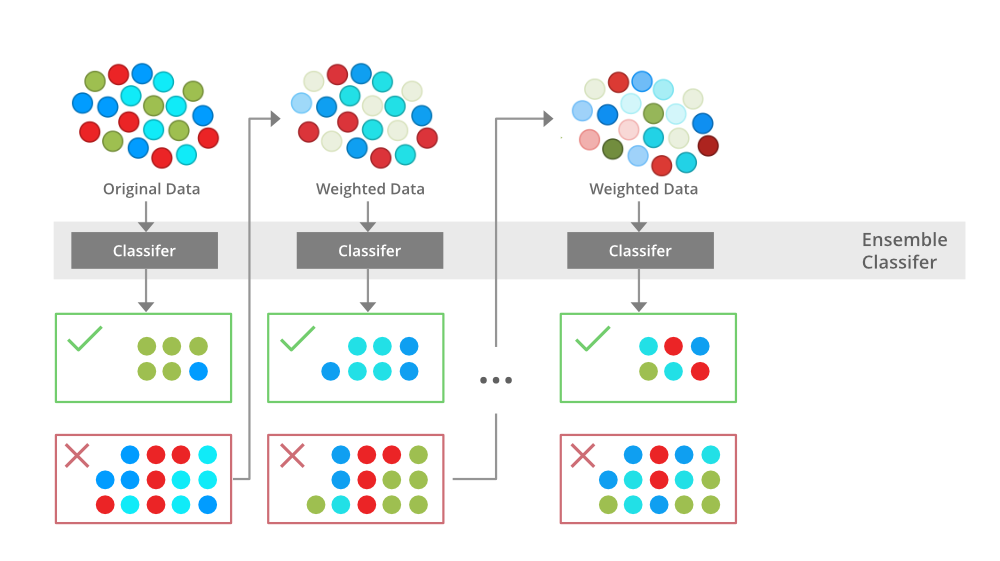

In [ ]:
GB=GradientBoostingClassifier(n_estimators=12)

In [ ]:
GB.fit(X_train,y_train)

In [ ]:
y_pred=GB.predict(X_test)
y_pred

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
train_acc=GB.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

In [ ]:
compare.loc[6]=['Gradient Boosting', train_acc, test_acc, f1, recal, prec]

In [ ]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

#7. Stochastic Gradient Descent
Stochastic Gradient Descent (SGD) is a variant of the Gradient Descent algorithm that is used for optimizing machine learning models. It addresses the computational inefficiency of traditional Gradient Descent methods when dealing with large datasets in machine learning projects.

In SGD, instead of using the entire dataset for each iteration, only a single random training example (or a small batch) is selected to calculate the gradient and update the model parameters. This random selection introduces randomness into the optimization process, hence the term “stochastic” in stochastic Gradient Descent

The advantage of using SGD is its computational efficiency, especially when dealing with large datasets. By using a single example or a small batch, the computational cost per iteration is significantly reduced compared to traditional Gradient Descent methods that require processing the entire dataset.

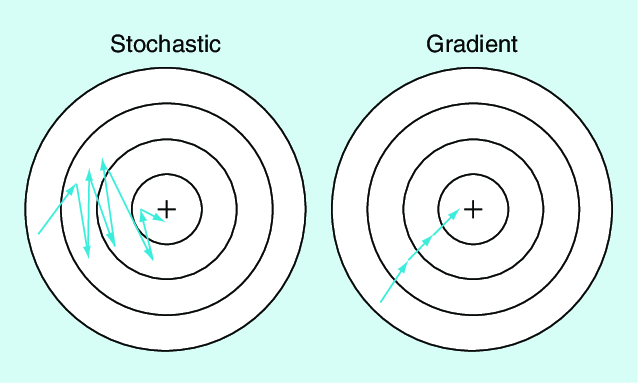

The concrete loss function can be set via the loss parameter. SGDClassifier supports the following loss functions:

    loss="hinge": (soft-margin) linear Support Vector Machine,

    loss="modified_huber": smoothed hinge loss,

    loss="log_loss": logistic regression,

    and all regression losses

In [ ]:
SGD=SGDClassifier(loss='modified_huber', random_state=10)

In [ ]:
SGD.fit(X_train,y_train)

In [ ]:
y_pred=SGD.predict(X_test)
y_pred

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
train_acc=SGD.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

In [ ]:
compare.loc[7]=['Stochastic Gradient Descent', train_acc, test_acc, f1, recal, prec]

In [ ]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

#8. XGBoost
* XGBoost is an optimized distributed gradient boosting library designed for efficient and scalable training of machine learning models. It is **an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction**.
* XGBoost stands for “**Extreme Gradient Boosting**” and it has become one of the most popular and widely used machine learning algorithms due to its ability to handle large datasets and its ability to achieve state-of-the-art performance in many machine learning tasks such as classification and regression.

* One of the key features of XGBoost is its efficient handling of missing values, which allows it to handle real-world data with missing values without requiring significant pre-processing.
* Additionally, XGBoost has built-in support for parallel processing, making it possible to train models on large datasets in a reasonable amount of time.

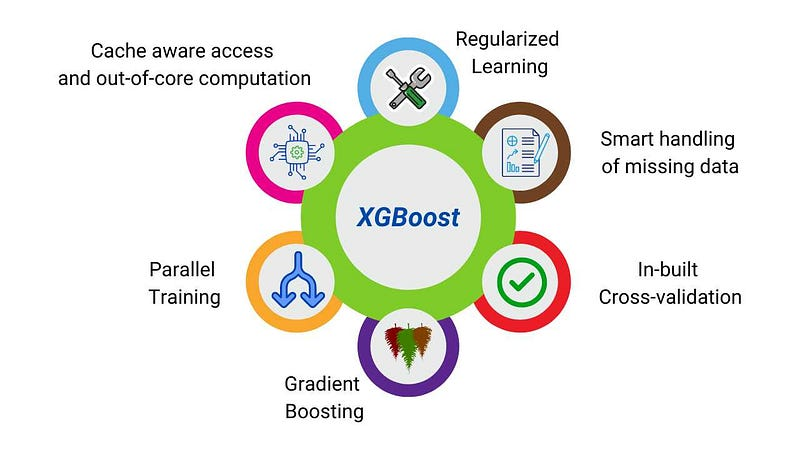



In [ ]:
XGB= XGBClassifier(random_state=0,n_estimators=88,booster='gbtree')

In [ ]:
XGB.fit(X_train,y_train)

In [ ]:
y_pred=XGB.predict(X_test)
y_pred

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
train_acc=XGB.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

In [ ]:
compare.loc[8]=['XGBoost', train_acc, test_acc, f1, recal, prec]

In [ ]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

#9. Light Gradient Boosting Machine (LGBM)
It is based on decision trees designed to *improve model efficiency and reduce memory usage*. It incorporates several novel techniques, including Gradient-based One-Side Sampling (GOSS), which selectively retains instances with large gradients during training to optimize memory usage and training time.

A LightGBM tree is a decision tree structure used in the LightGBM gradient boosting framework. It consists of nodes representing feature splits and leaf nodes containing predictions. LightGBM trees are constructed recursively in a leaf-wise manner, focusing on maximizing the reduction in loss at each step during training. In each split, it tries to optimize a specific objective function. It supports various splitting criteria and pruning techniques to optimize model performance. These trees collectively form an ensemble model, where predictions are made by aggregating the outputs of individual trees, resulting in accurate and efficient machine learning models.

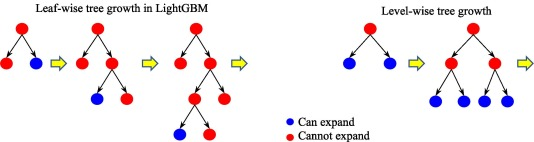

In [ ]:
LGBM=LGBMClassifier(random_state=0,n_estimators=22)

In [ ]:
LGBM.fit(X_train,y_train)

In [ ]:
y_pred=LGBM.predict(X_test)
y_pred

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
train_acc=LGBM.score(X_train,y_train)
test_acc=accuracy_score(y_test,y_pred)
recal=recall_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

In [ ]:
compare.loc[9]=['LGBM', train_acc, test_acc, f1, recal, prec]

In [ ]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.show()

#Model Selection / Conclusion

In [ ]:
compare

In [ ]:
ax=sns.barplot(data=compare,y='Model',x='Training Accuracy', hue='Model')
for i in ax.containers:
    ax.bar_label(i)

In [ ]:
ax=sns.barplot(data=compare,y='Model',x='Testing Accuracy', hue='Model')
for i in ax.containers:
    ax.bar_label(i)

In [ ]:
ax=sns.barplot(data=compare,y='Model',x='F1 Score', hue='Model')
for i in ax.containers:
    ax.bar_label(i)

In [ ]:
ax=sns.barplot(data=compare,y='Model',x='Precision', hue='Model')
for i in ax.containers:
    ax.bar_label(i)

In [ ]:
ax=sns.barplot(data=compare,y='Model',x='Recall', hue='Model')
for i in ax.containers:
    ax.bar_label(i)

##Summary and Best Model Choice
####Based on these metrics:

* **Best All-Around Model:** XGBoost, due to its high testing accuracy, F1 Score, and balanced recall and precision.
* **Alternative Strong Performers:** Support Vector Machine (SVM) and Random Forest also perform well, with high precision and minimal trade-off between recall and accuracy.